In [31]:
%pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
#pip install git+https://github.com/KindXiaoming/pykan.git
import sys

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\migue\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [32]:
import random
import numpy as np
import torch
import os

def set_global_seed(seed=42):
    """Set seed for reproducibility across NumPy, PyTorch, and OS operations."""
    
    # Set Python random seed
    random.seed(seed)
    
    # Set NumPy random seed
    np.random.seed(seed)
    
    # Set PyTorch random seed
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # If using CUDA
    
    # Ensure deterministic behavior in PyTorch (optional, can slow training)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    # Set environment variable for other libraries
    os.environ["PYTHONHASHSEED"] = str(seed)

# Set global seed
set_global_seed(42)


In [33]:
import os
import pandas as pd

# Set the path to your directory
combined_df = pd.read_excel(r"C:\Users\migue\Desktop\thesis\CICIDS2017_sample by Panigrahi R.xlsx")

In [34]:
combined_df

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,newLabel
0,50956,443,6,278351,10,5,588,3832,198,0,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Normal
1,22,8938,6,2,1,2,0,0,0,0,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Normal
2,80,62184,6,24136457,1,5,6,30,6,6,...,20,42392.000,0.000000e+00,42392,42392,24100000.0,0.000000e+00,24100000,24100000,Normal
3,63563,53,17,206,2,2,112,368,56,56,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Normal
4,44123,53,17,198,2,2,66,164,33,33,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91825,1260,444,6,99891716,15,15,5065,90,1460,6,...,20,569902.000,0.000000e+00,569902,569902,98800000.0,0.000000e+00,98800000,98800000,Infiltration
91826,54573,444,6,20,2,0,12,0,6,6,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
91827,54573,444,6,78233714,48,52,12042,586,1460,0,...,20,2024843.800,3.093999e+06,7461188,3051,13600000.0,1.020000e+07,29500000,5662979,Infiltration
91828,54119,444,6,119995180,1819,1817,489184,10902,1271,6,...,20,5863632.333,4.482322e+06,9355307,809115,14700000.0,1.610000e+07,33200000,5108213,Infiltration


In [35]:
combined_df.dropna(inplace=True)

In [36]:
train_data = combined_df

In [37]:
columns_numeric = train_data.select_dtypes(include="number").columns

In [38]:
Y = train_data["newLabel"]

In [39]:
Y

0              Normal
1              Normal
2              Normal
3              Normal
4              Normal
             ...     
91825    Infiltration
91826    Infiltration
91827    Infiltration
91828    Infiltration
91829    Infiltration
Name: newLabel, Length: 91753, dtype: object

In [40]:
len(columns_numeric)

79

In [41]:
X = train_data
for col in train_data.columns:
    if col not in columns_numeric:
        X.drop(columns = col, inplace = True)

In [42]:
X

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,50956,443,6,278351,10,5,588,3832,198,0,...,9,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
1,22,8938,6,2,1,2,0,0,0,0,...,0,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
2,80,62184,6,24136457,1,5,6,30,6,6,...,0,20,42392.000,0.000000e+00,42392,42392,24100000.0,0.000000e+00,24100000,24100000
3,63563,53,17,206,2,2,112,368,56,56,...,1,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,44123,53,17,198,2,2,66,164,33,33,...,1,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91825,1260,444,6,99891716,15,15,5065,90,1460,6,...,14,20,569902.000,0.000000e+00,569902,569902,98800000.0,0.000000e+00,98800000,98800000
91826,54573,444,6,20,2,0,12,0,6,6,...,1,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
91827,54573,444,6,78233714,48,52,12042,586,1460,0,...,47,20,2024843.800,3.093999e+06,7461188,3051,13600000.0,1.020000e+07,29500000,5662979
91828,54119,444,6,119995180,1819,1817,489184,10902,1271,6,...,1818,20,5863632.333,4.482322e+06,9355307,809115,14700000.0,1.610000e+07,33200000,5108213


In [43]:
columns_numeric = [
    col for col in columns_numeric
    if not len(train_data[col].value_counts()) < 2
]

In [44]:
len(columns_numeric)

71

In [45]:
train_data

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,50956,443,6,278351,10,5,588,3832,198,0,...,9,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
1,22,8938,6,2,1,2,0,0,0,0,...,0,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
2,80,62184,6,24136457,1,5,6,30,6,6,...,0,20,42392.000,0.000000e+00,42392,42392,24100000.0,0.000000e+00,24100000,24100000
3,63563,53,17,206,2,2,112,368,56,56,...,1,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,44123,53,17,198,2,2,66,164,33,33,...,1,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91825,1260,444,6,99891716,15,15,5065,90,1460,6,...,14,20,569902.000,0.000000e+00,569902,569902,98800000.0,0.000000e+00,98800000,98800000
91826,54573,444,6,20,2,0,12,0,6,6,...,1,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
91827,54573,444,6,78233714,48,52,12042,586,1460,0,...,47,20,2024843.800,3.093999e+06,7461188,3051,13600000.0,1.020000e+07,29500000,5662979
91828,54119,444,6,119995180,1819,1817,489184,10902,1271,6,...,1818,20,5863632.333,4.482322e+06,9355307,809115,14700000.0,1.610000e+07,33200000,5108213


In [46]:
train_data.columns

Index(['Source Port', 'Destination Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytess',
       'Flow Packetss', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packetss', 'Bwd Packetss',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Coun

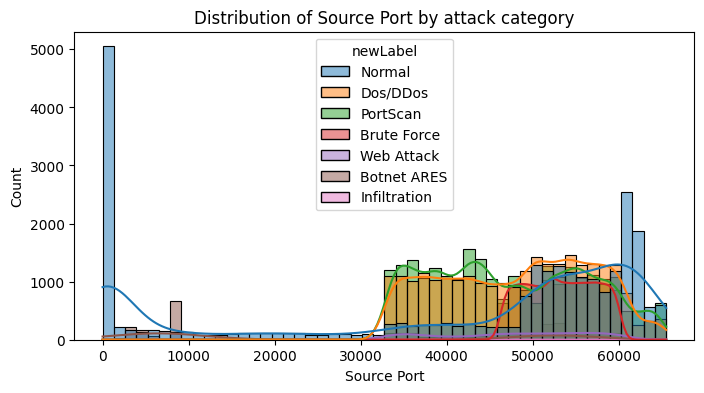

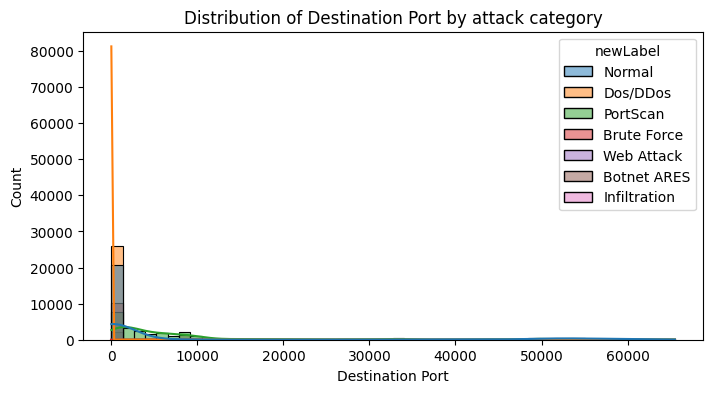

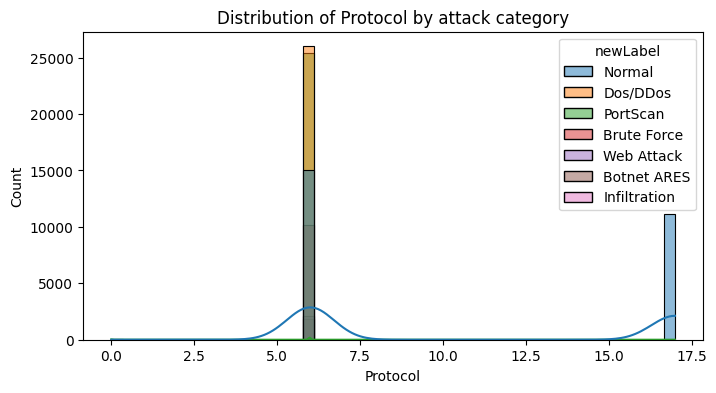

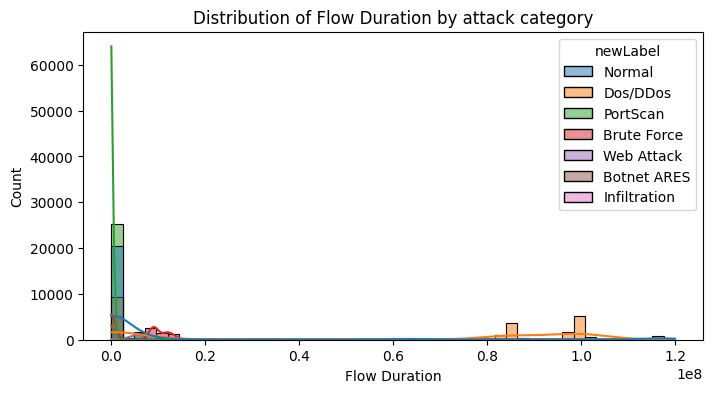

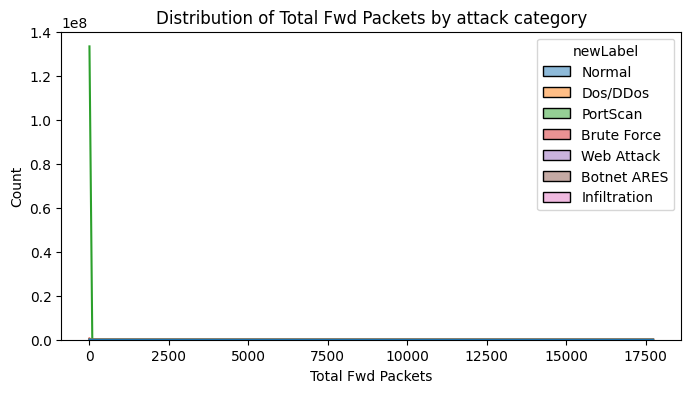

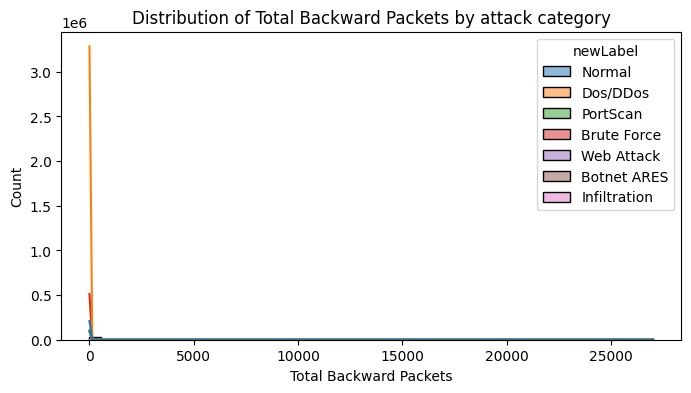

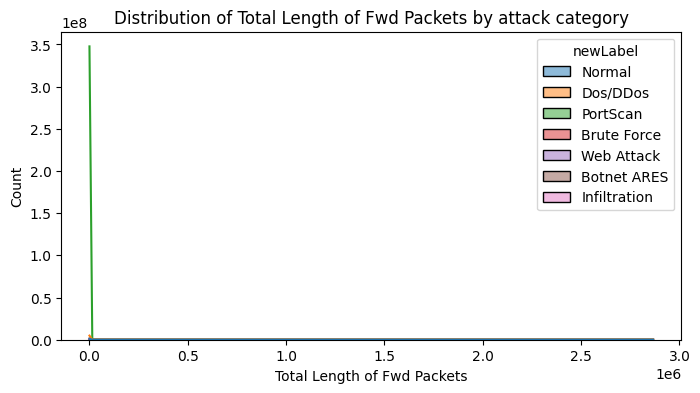

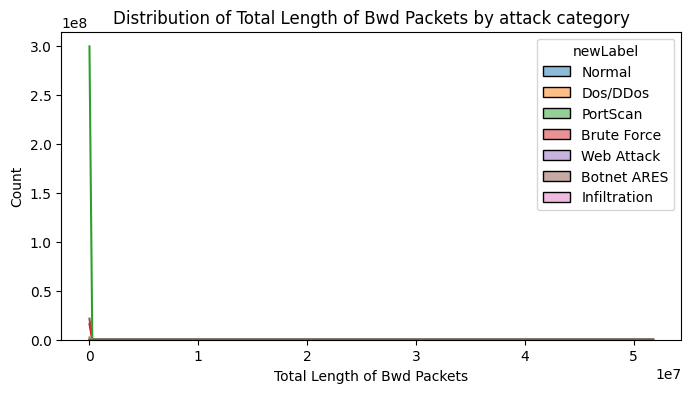

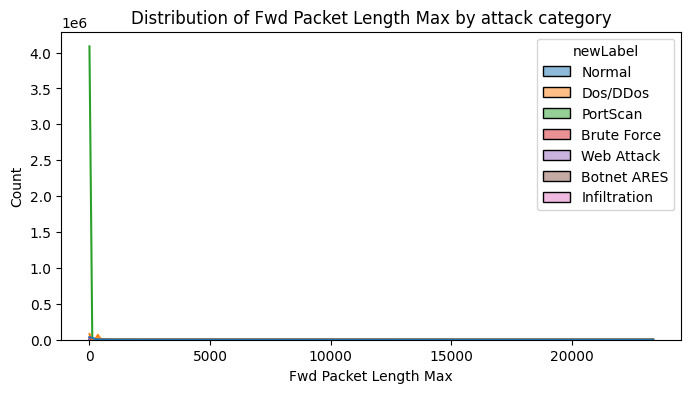

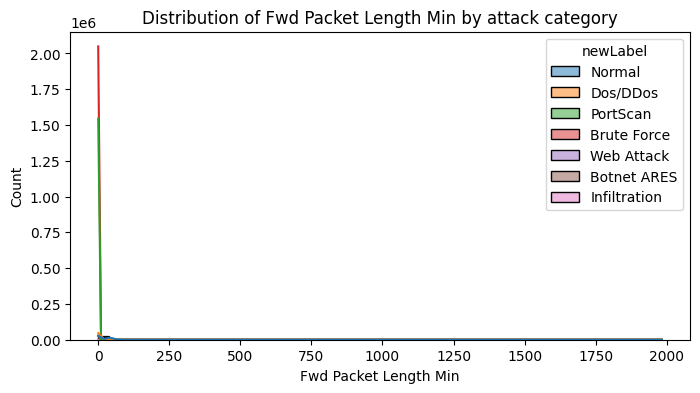

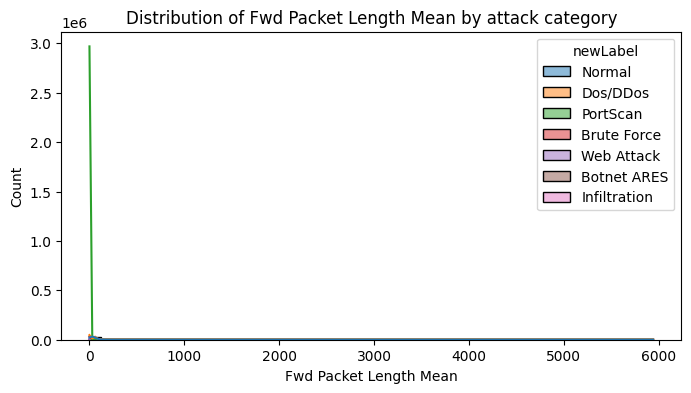

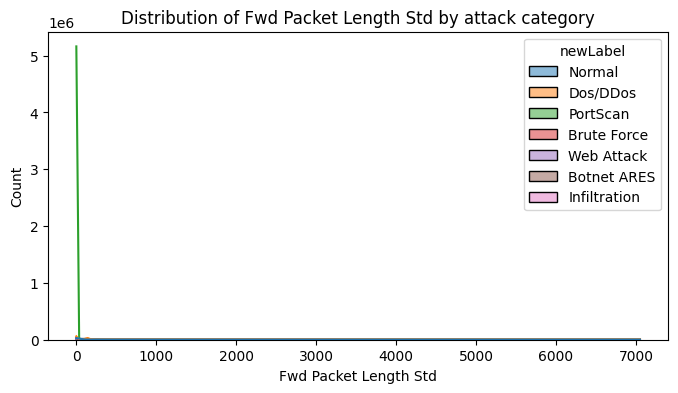

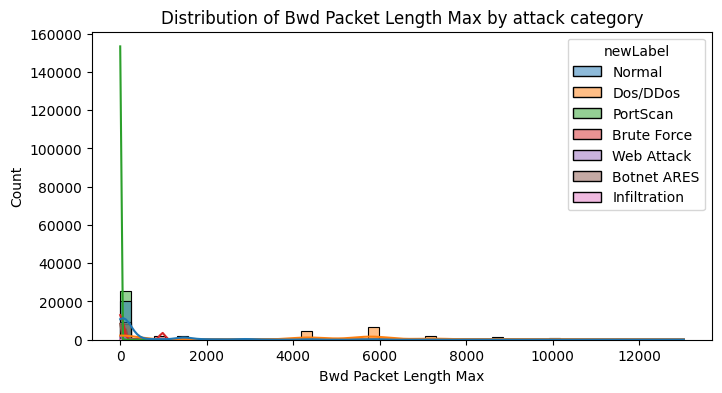

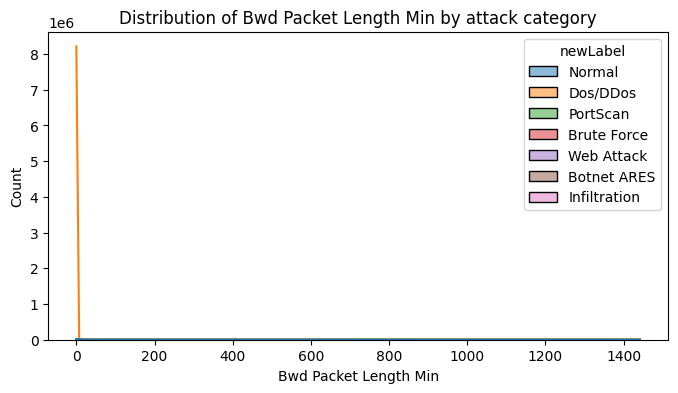

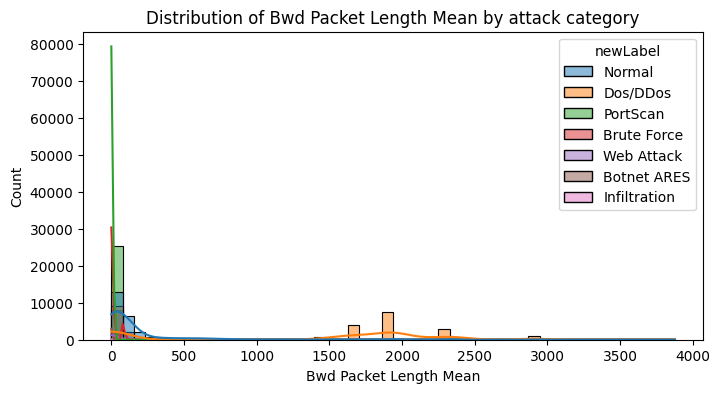

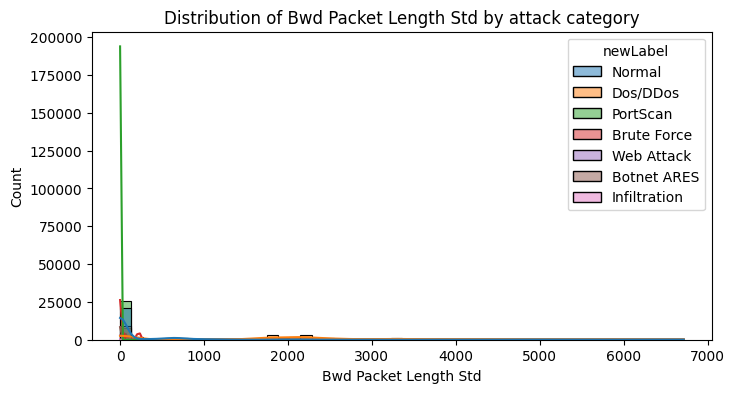

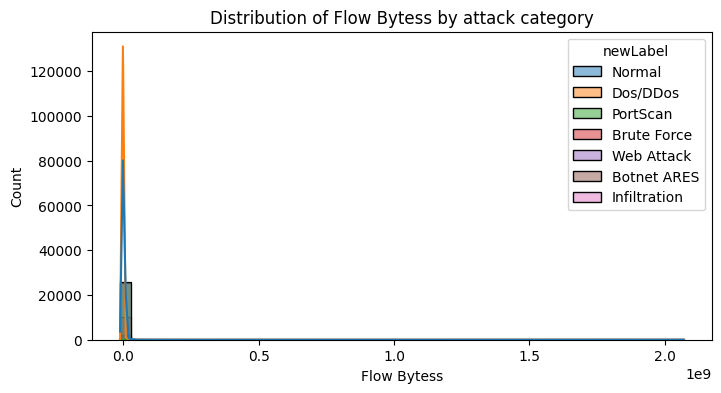

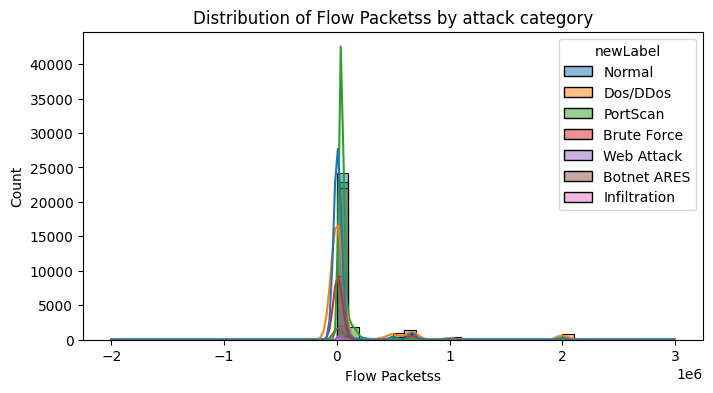

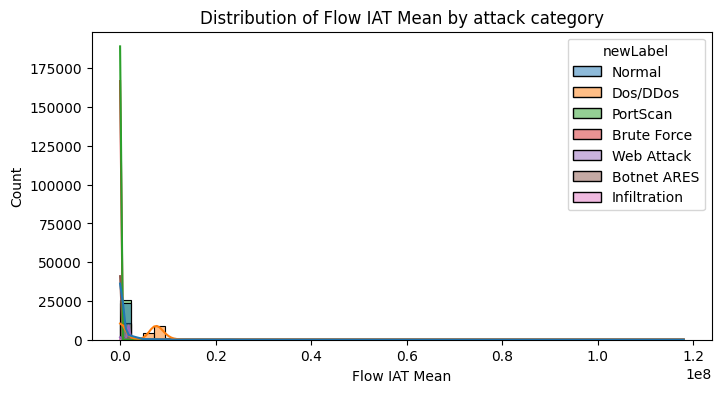

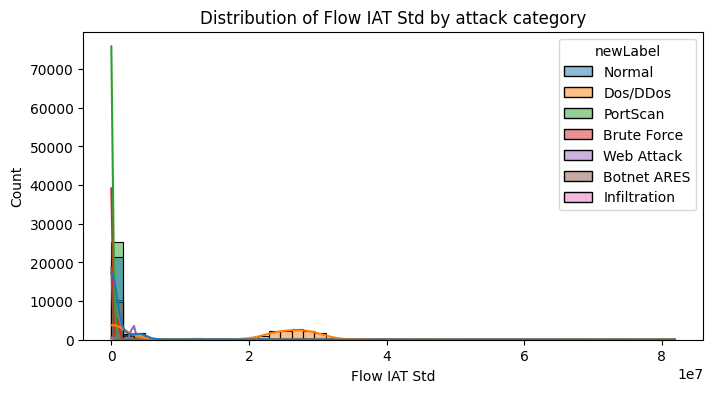

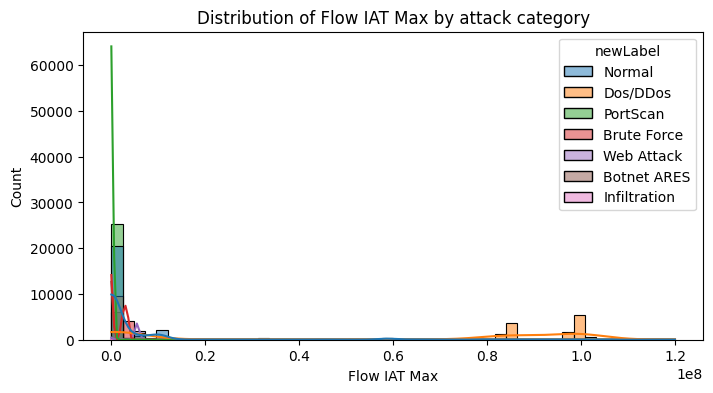

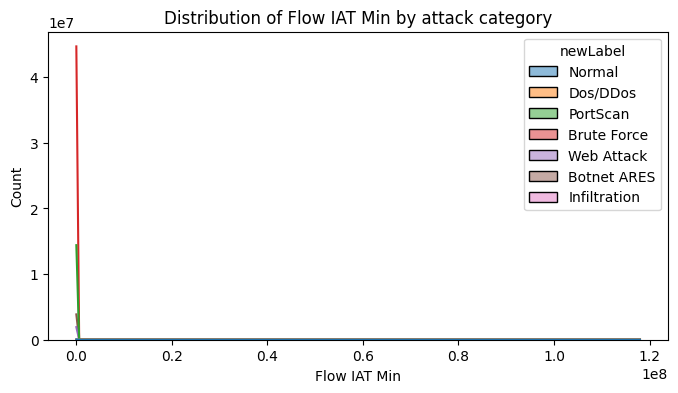

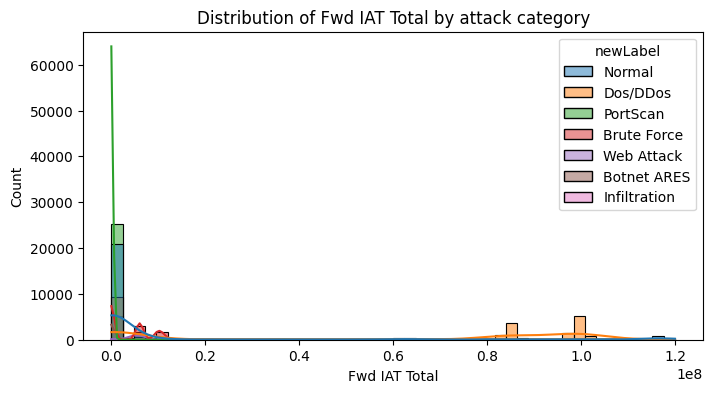

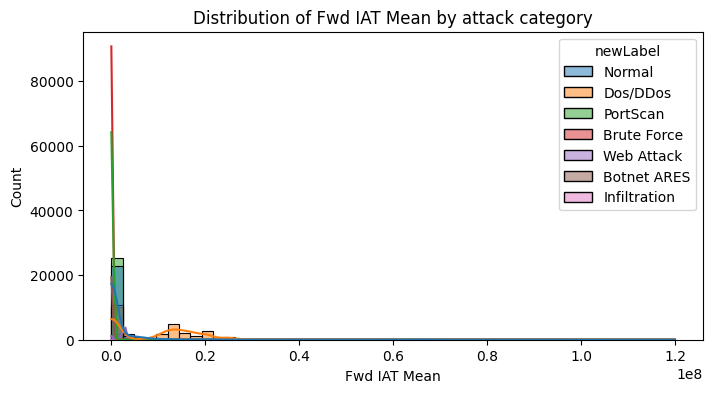

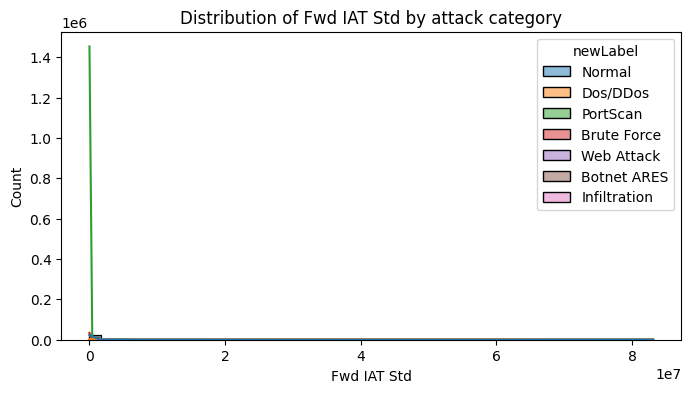

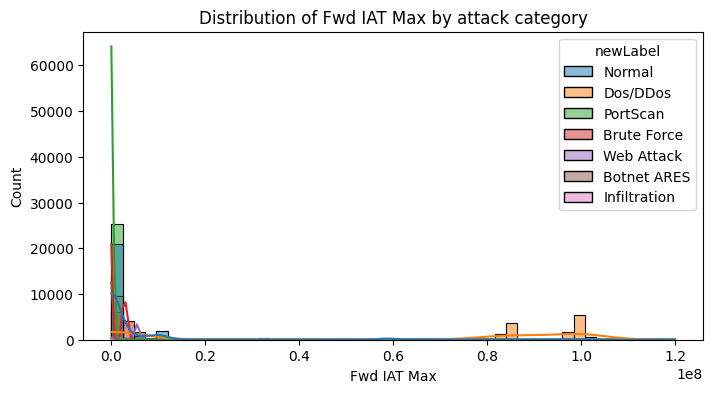

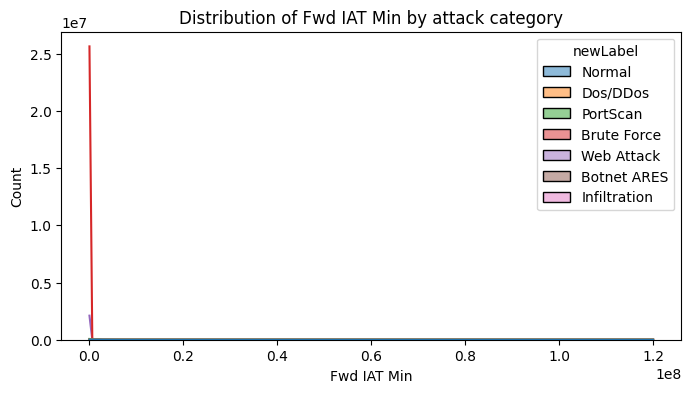

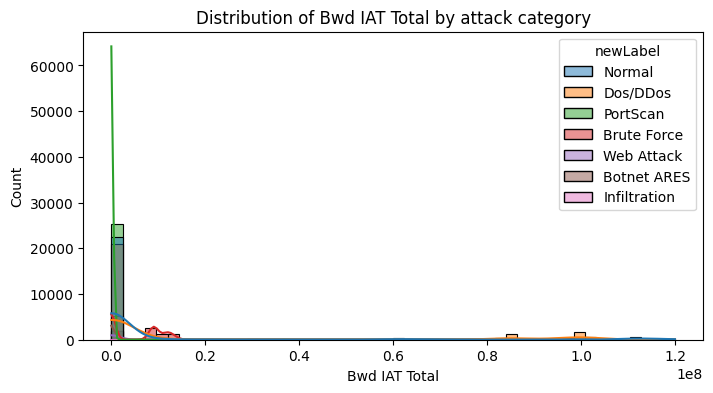

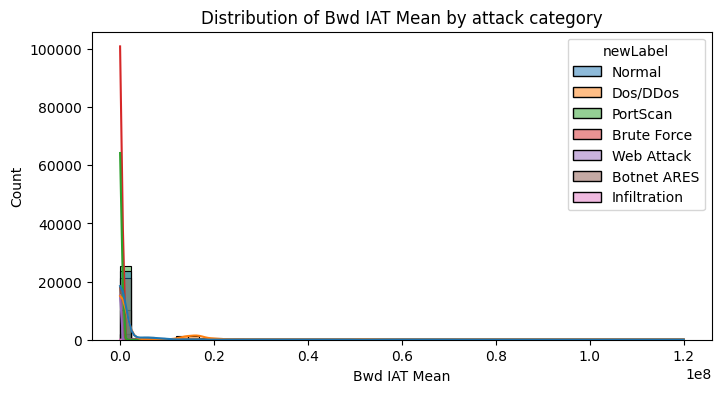

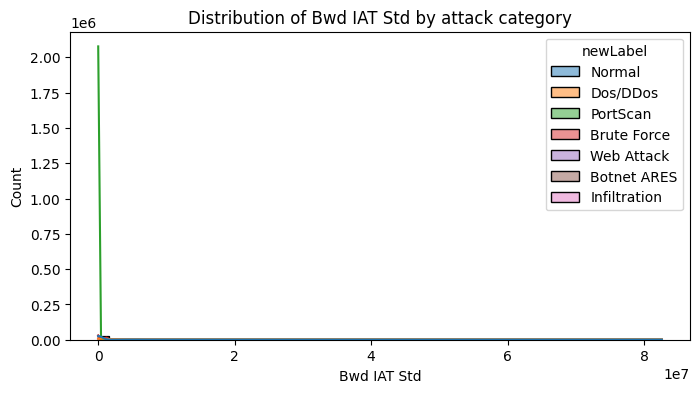

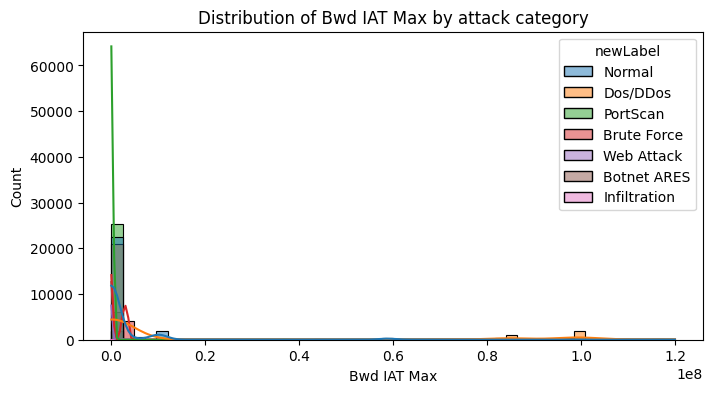

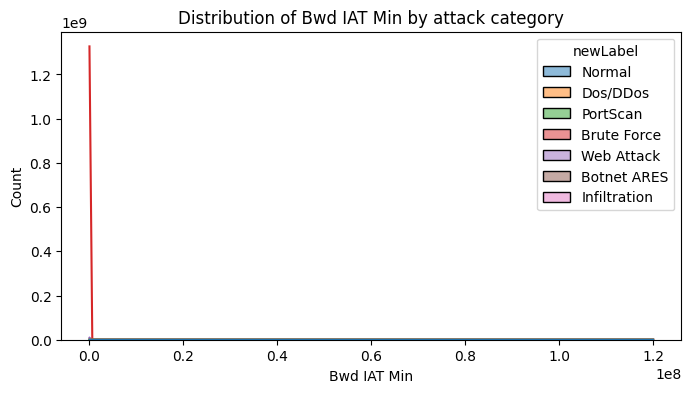

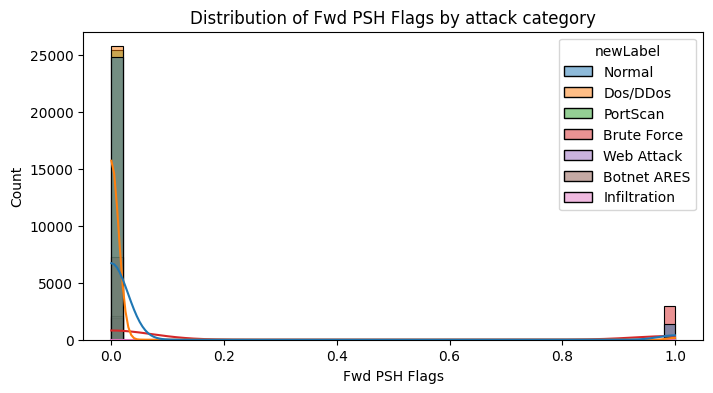

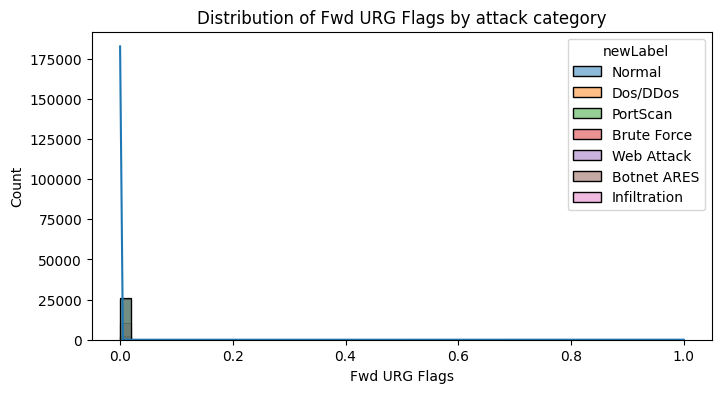

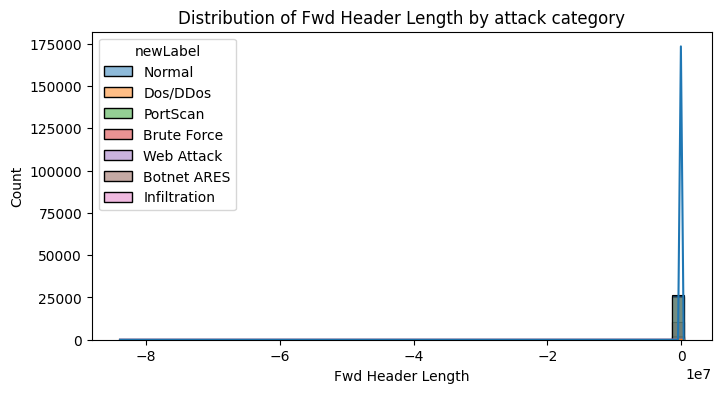

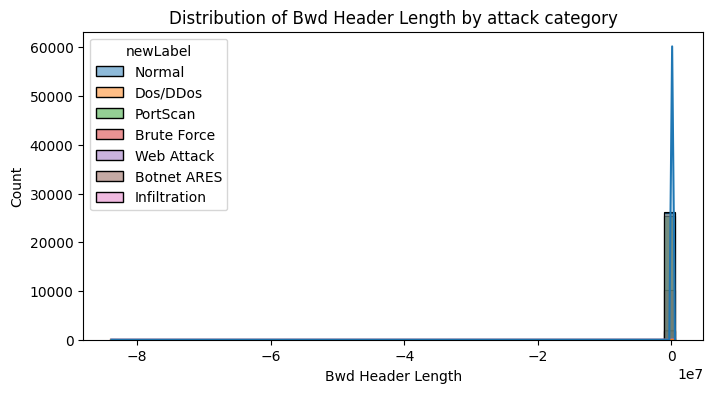

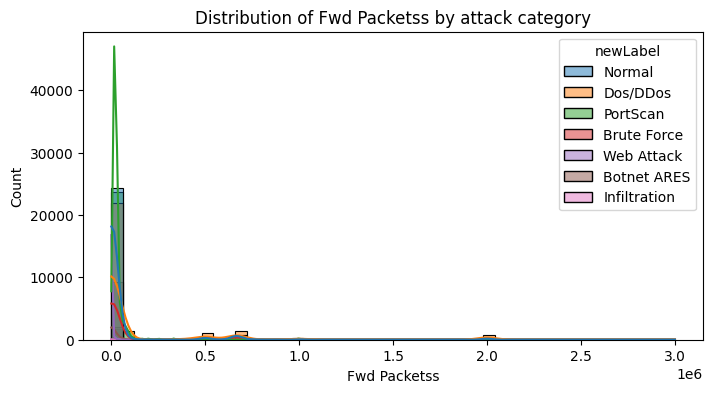

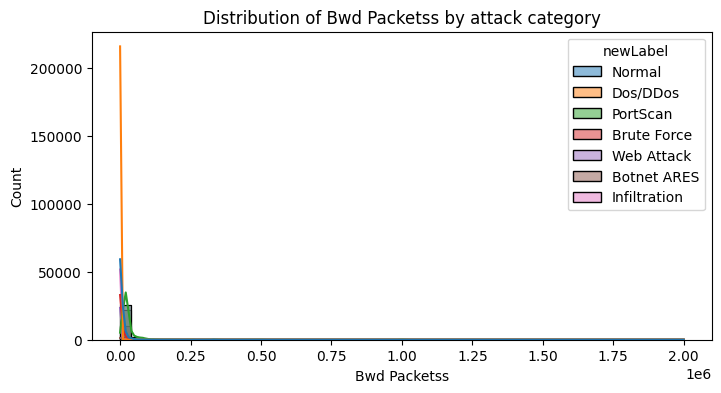

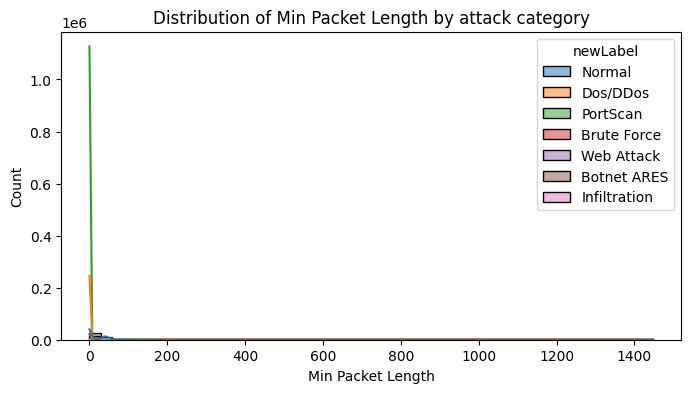

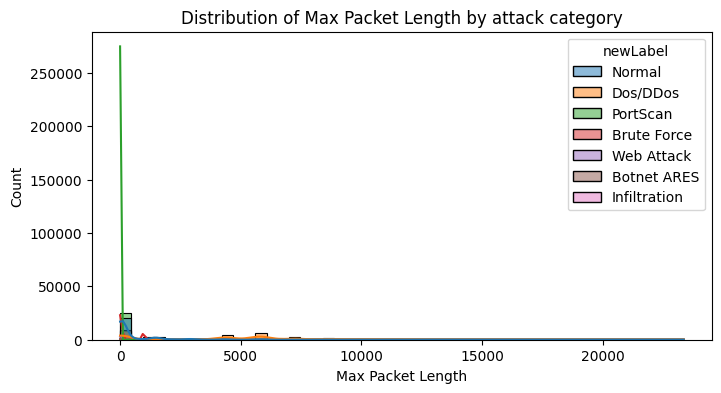

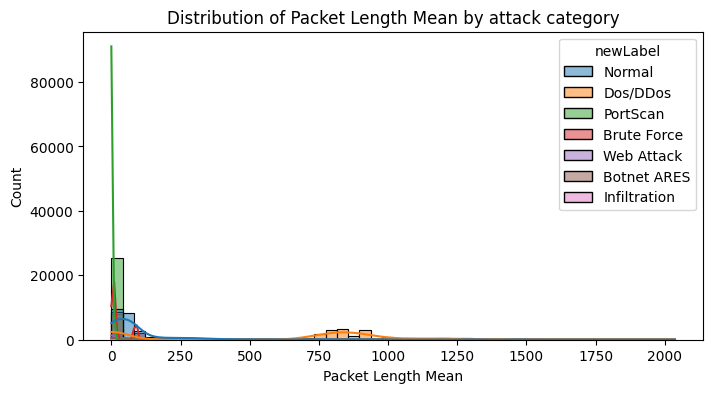

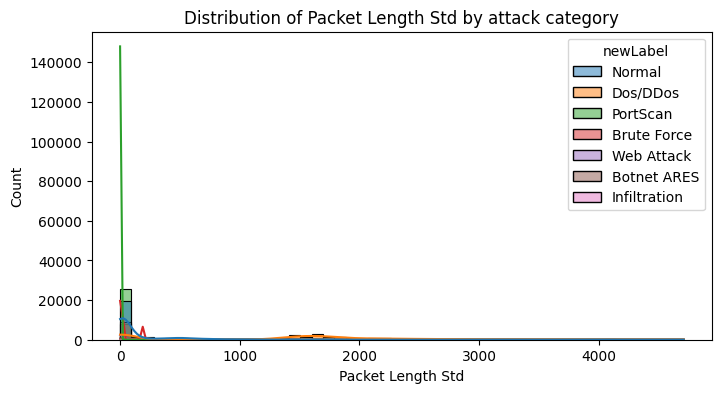

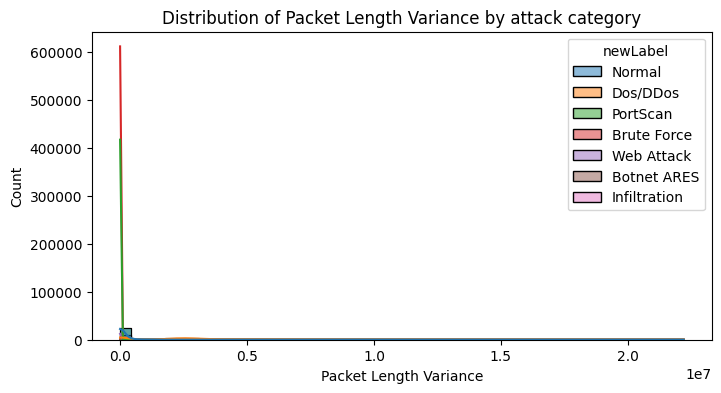

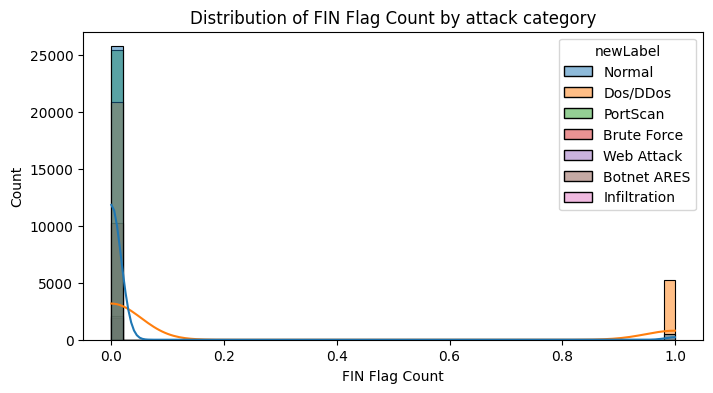

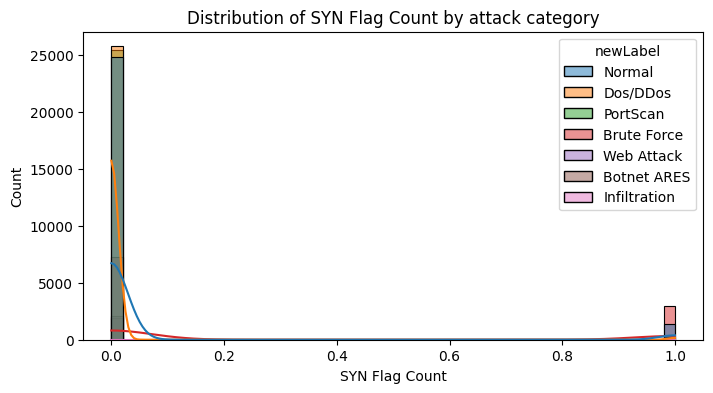

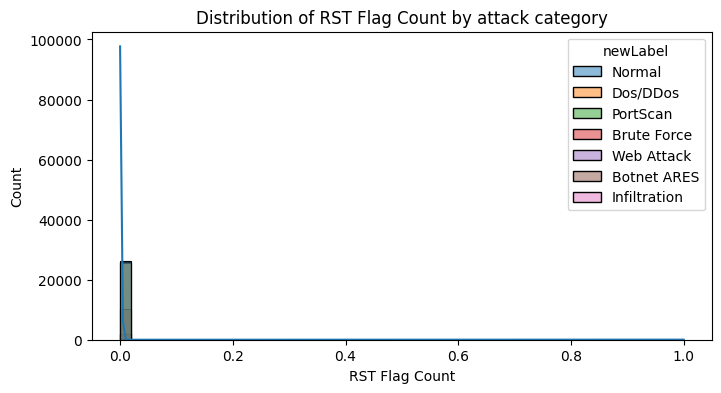

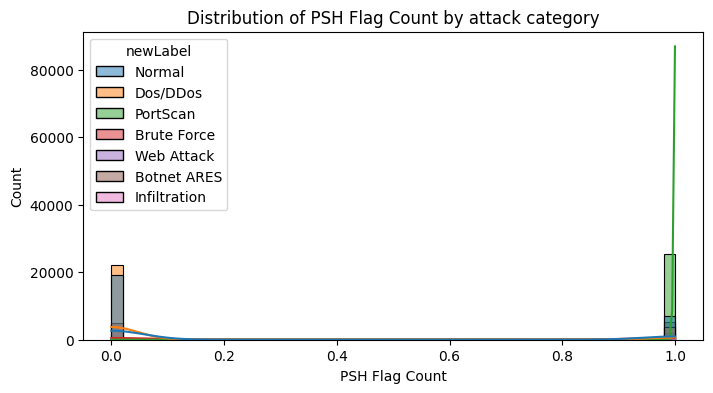

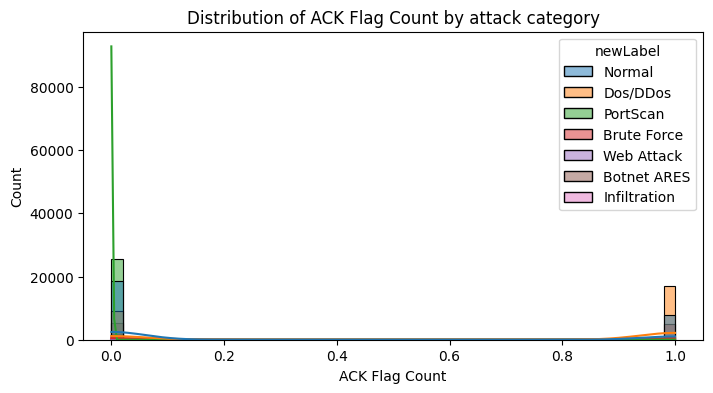

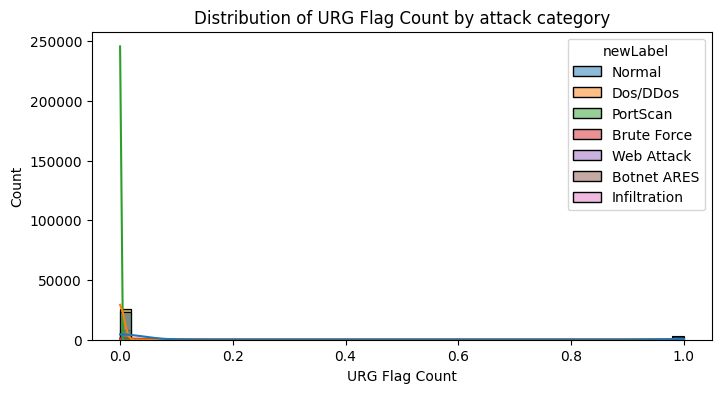

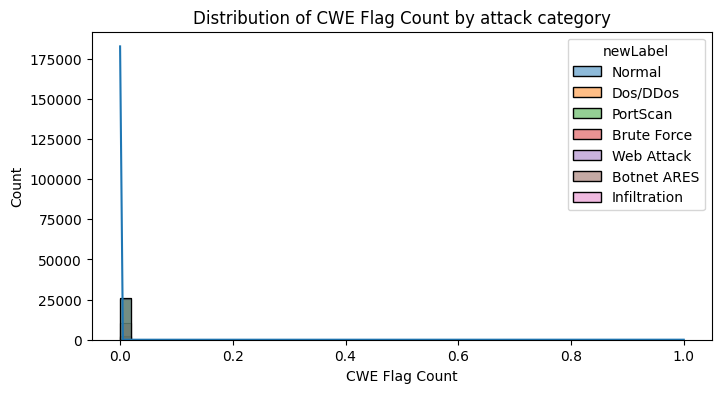

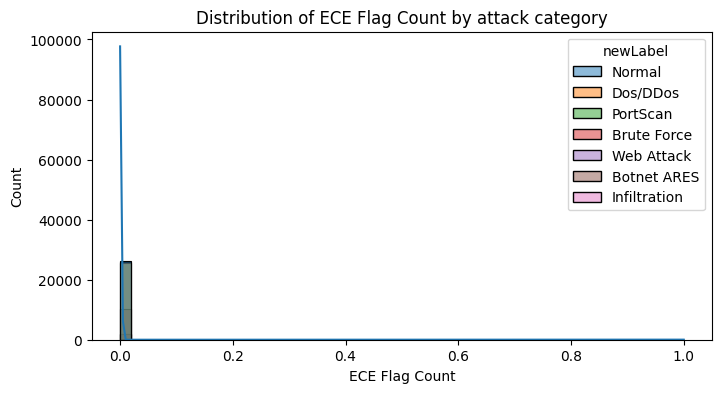

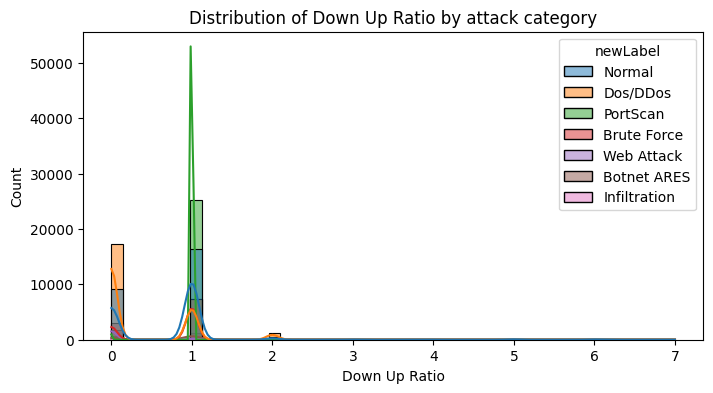

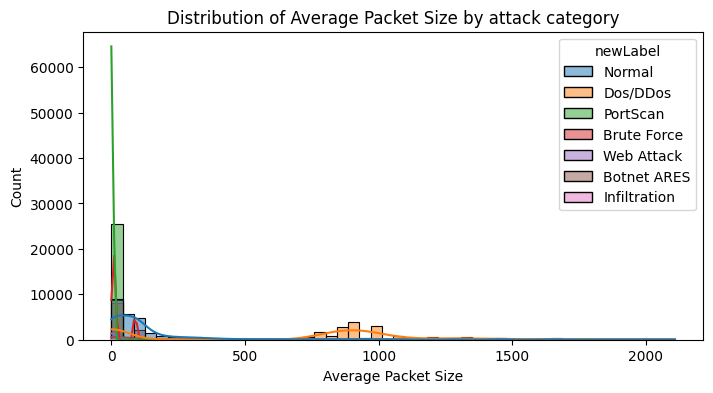

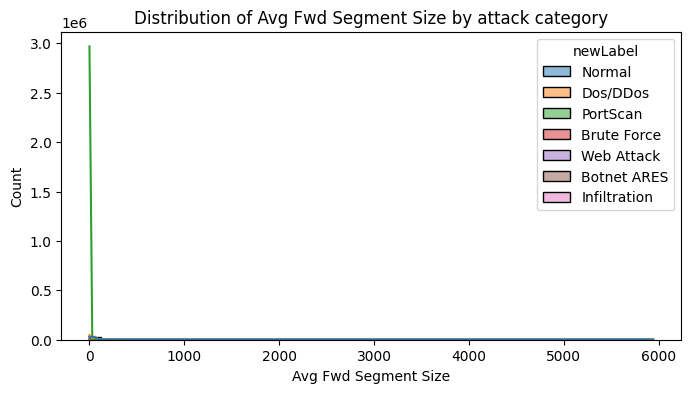

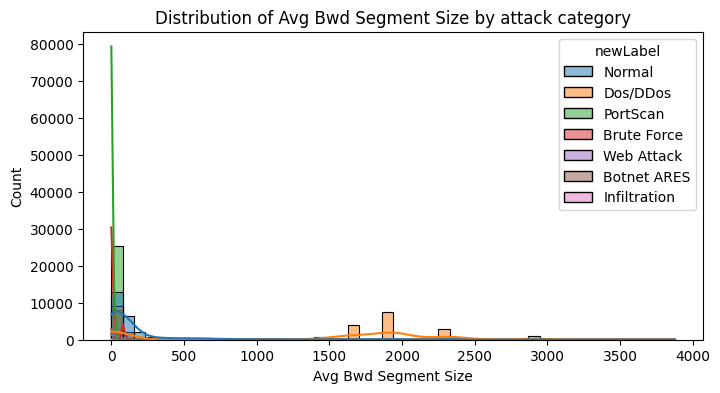

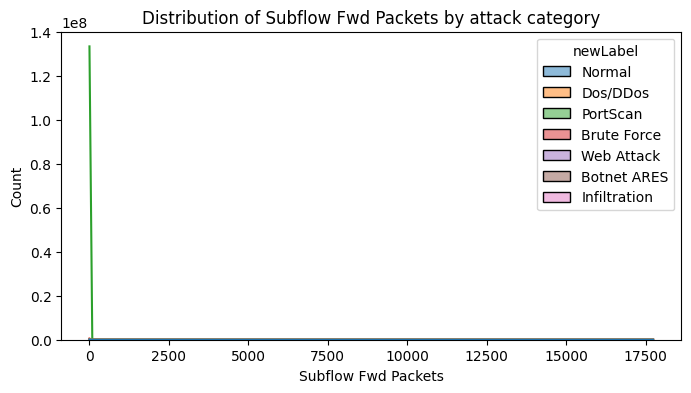

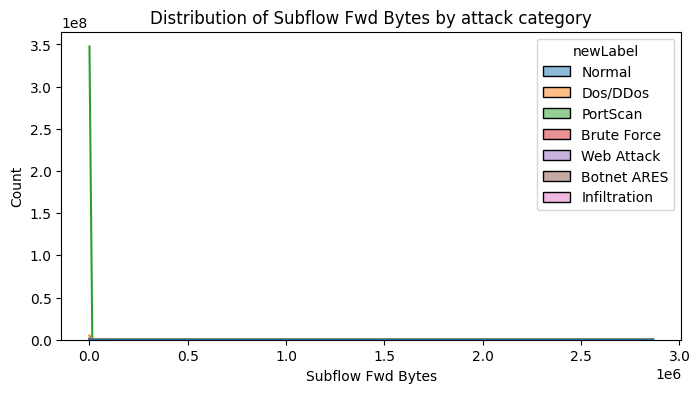

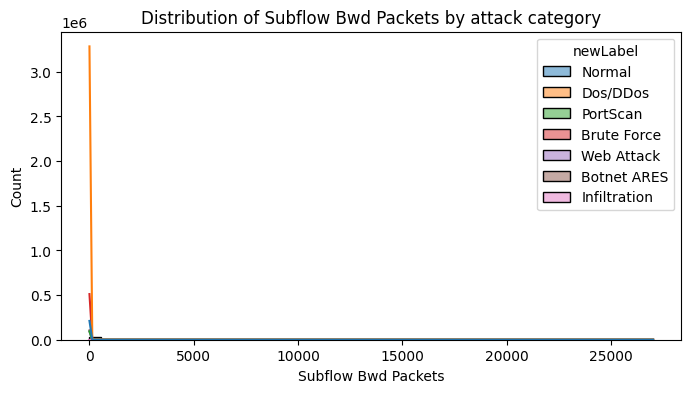

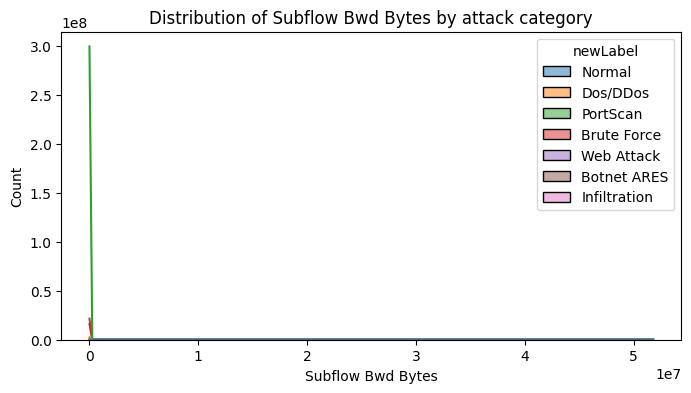

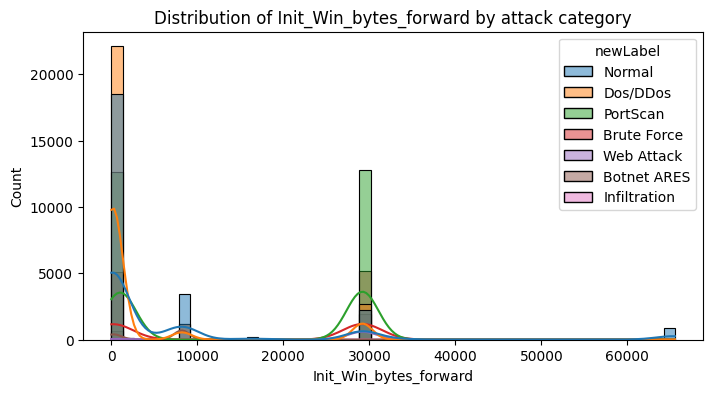

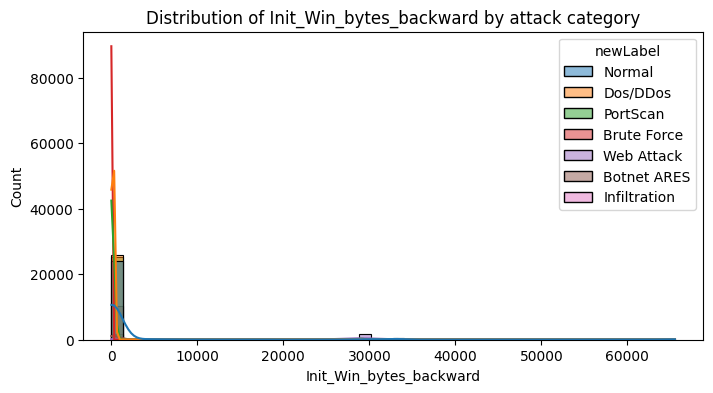

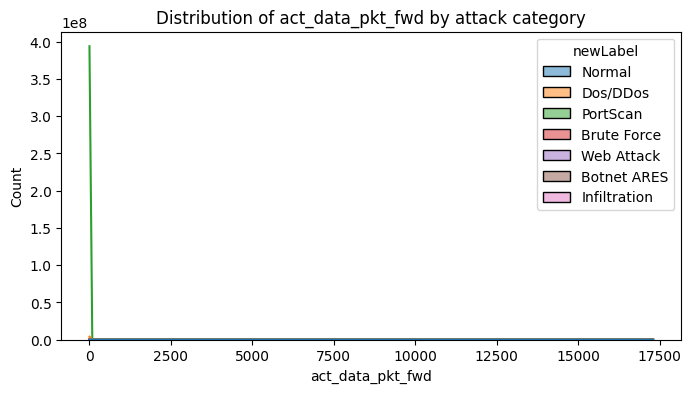

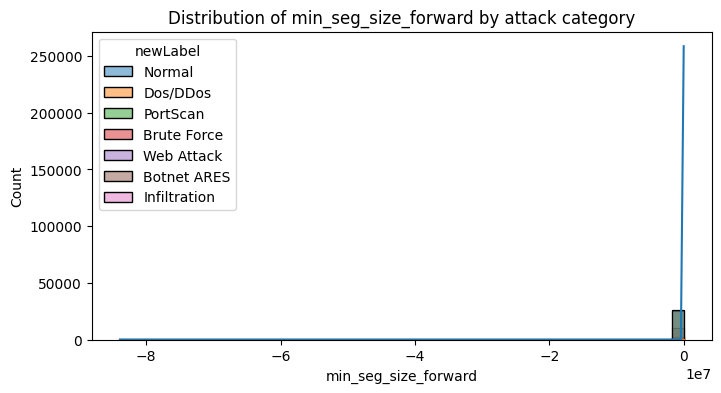

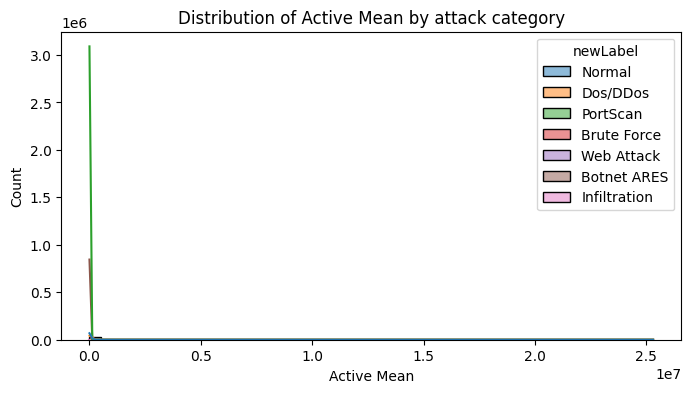

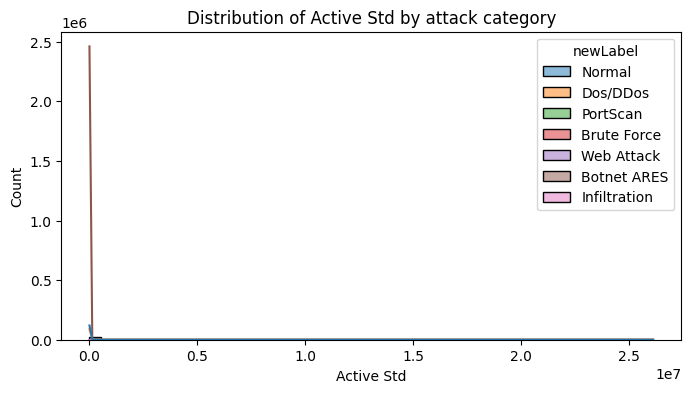

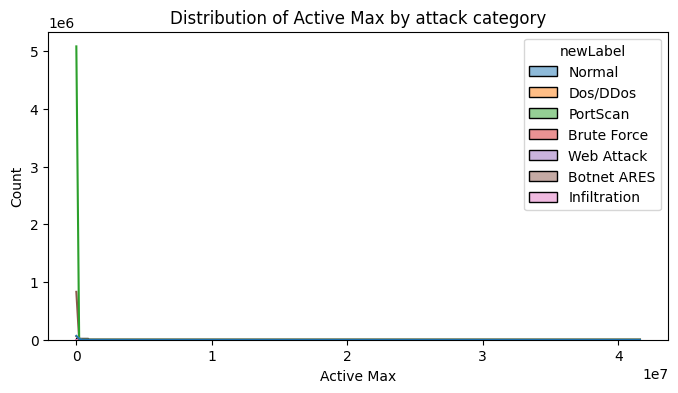

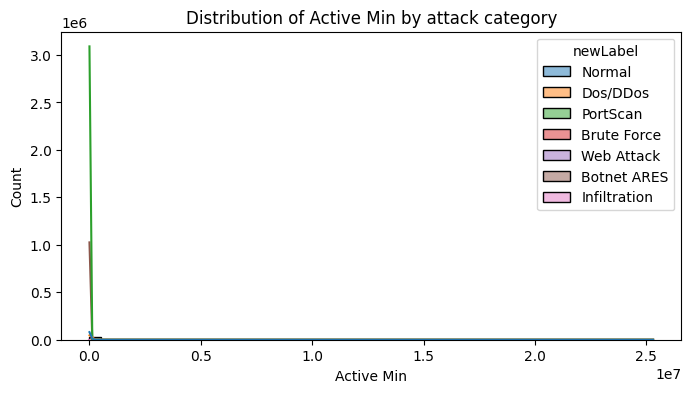

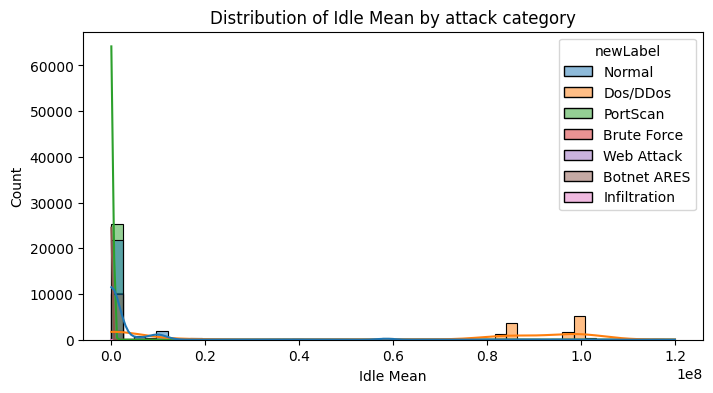

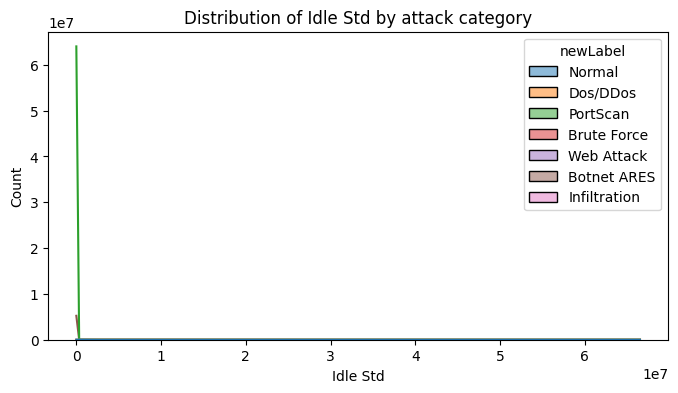

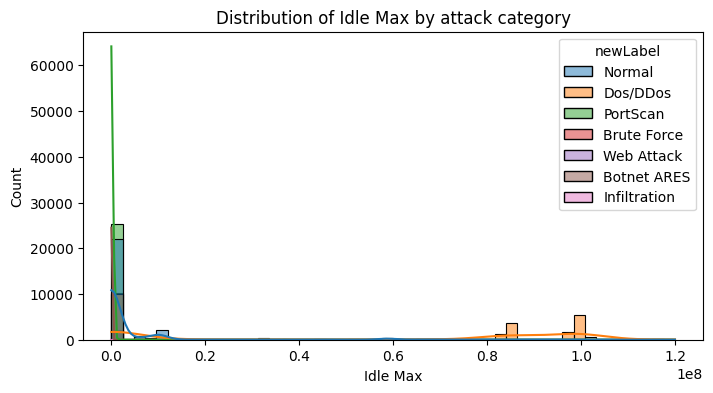

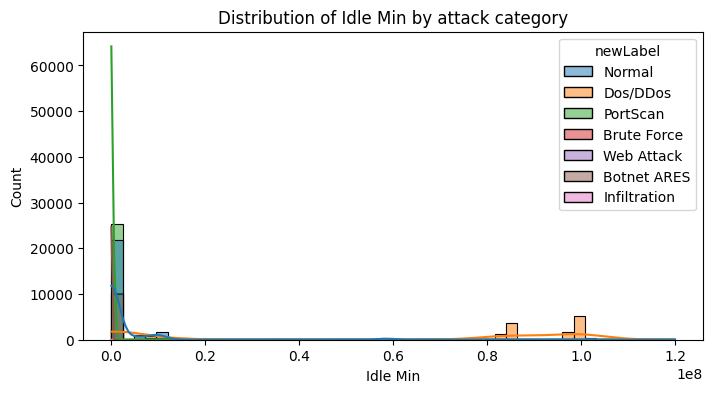

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each numerical column and plot histogram with hue
for col in columns_numeric:
    plt.figure(figsize=(8, 4))  # Set figure size
    sns.histplot(data=train_data, x=col, hue=Y, kde=True, bins=50)
    plt.title(f"Distribution of {col} by attack category")
    plt.show()


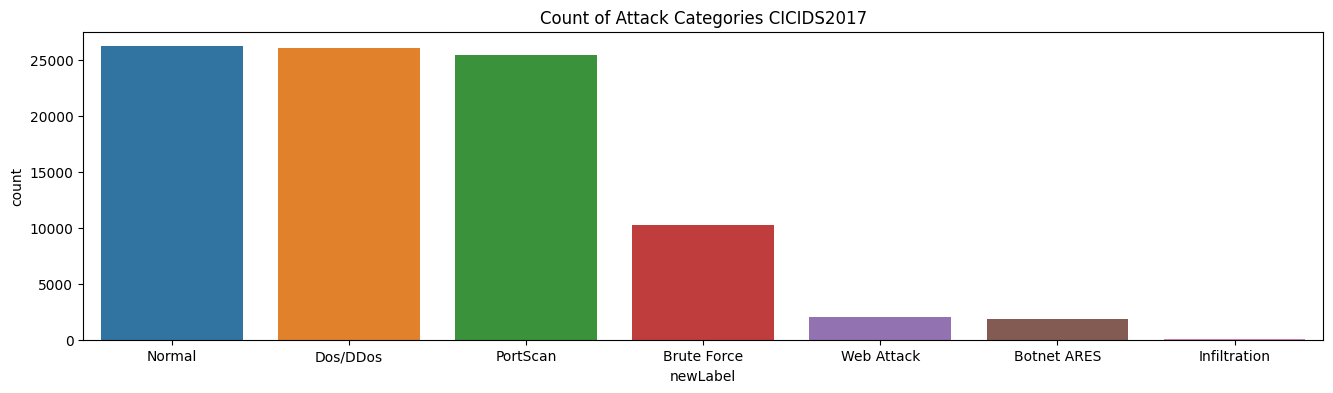

In [48]:
plt.figure(figsize=(16, 4))  # Set figure size
sns.countplot(data=train_data, x=Y, hue=Y)
plt.title("Count of Attack Categories CICIDS2017")
plt.show()

In [49]:
train_data_objects = X.select_dtypes(include = ["object"])

# Data Preprocessing

## Outlier Treatment

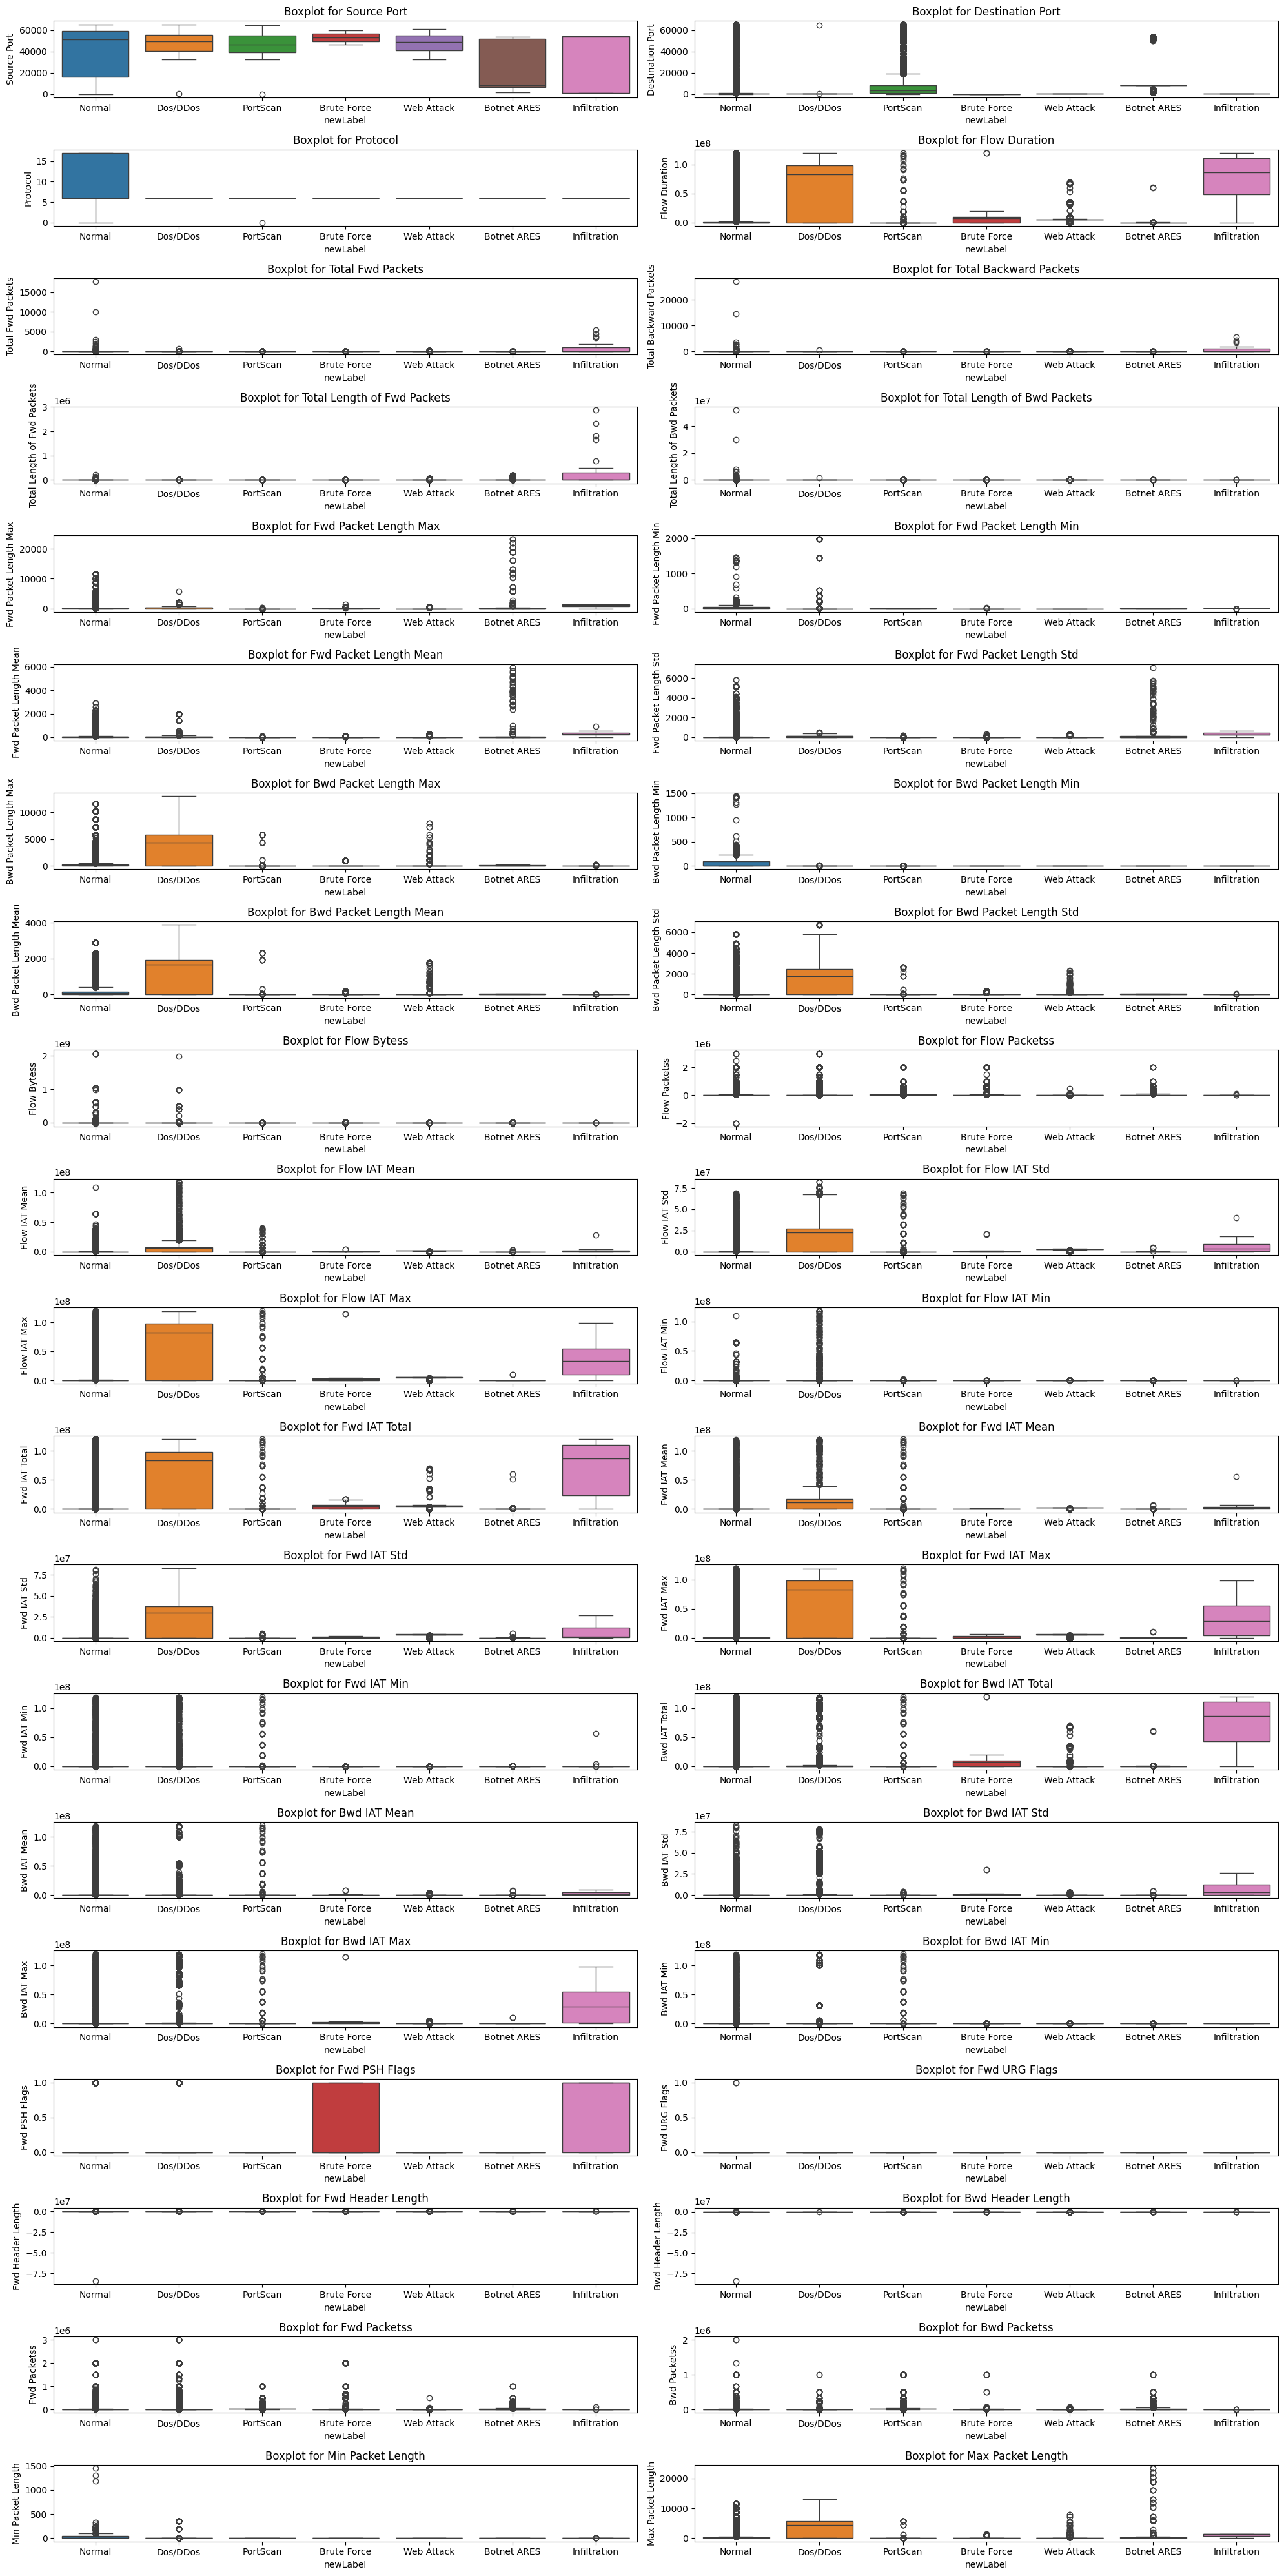

In [50]:
fig, axes = plt.subplots(20,2, figsize=(20,40), tight_layout=True)
axes = axes.flatten()

for col,ax in zip(columns_numeric, axes):
    g = sns.boxplot(data = X, y = col, x = Y, hue =Y, ax = ax, legend=False)
    g.set_title(f"Boxplot for {col}")
    
[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

plt.show()
    

## Normalizing and Scaling

In [62]:
import os
import pandas as pd

# Set the path to your directory
combined_df = pd.read_excel(r"C:\Users\migue\Desktop\thesis\CICIDS2017_sample by Panigrahi R.xlsx")

In [63]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91830 entries, 0 to 91829
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Source Port                  91830 non-null  int64  
 1   Destination Port             91830 non-null  int64  
 2   Protocol                     91830 non-null  int64  
 3   Flow Duration                91830 non-null  int64  
 4   Total Fwd Packets            91830 non-null  int64  
 5   Total Backward Packets       91830 non-null  int64  
 6   Total Length of Fwd Packets  91830 non-null  int64  
 7   Total Length of Bwd Packets  91830 non-null  int64  
 8   Fwd Packet Length Max        91830 non-null  int64  
 9   Fwd Packet Length Min        91830 non-null  int64  
 10  Fwd Packet Length Mean       91830 non-null  float64
 11  Fwd Packet Length Std        91830 non-null  float64
 12  Bwd Packet Length Max        91830 non-null  int64  
 13  Bwd Packet Lengt

In [64]:
combined_df.dropna(inplace=True)

## Treating Skewness

In [65]:
import pandas as pd

def inspect_extremes_for_log1p(df, threshold_neg=-1, top_n=5):
    """
    Displays statistics for each numeric column to detect values that may cause issues with log1p.
    
    Parameters:
    - df: pandas DataFrame
    - threshold_neg: minimum safe value for log1p is -1 (defaults to show anything below that)
    - top_n: number of top lowest values to show per column
    """
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        # Get min, count of negatives and values < threshold
        col_data = df[col]
        min_val = col_data.min()
        neg_count = (col_data < 0).sum()
        below_thresh_count = (col_data < threshold_neg).sum()
        inf_count = col_data.isin([np.inf, -np.inf]).sum()

        if neg_count > 0 or inf_count > 0:
            print(f"\n⚠️ Column: '{col}'")
            print(f"  - Min value: {min_val}")
            print(f"  - # of negative values: {neg_count}")
            print(f"  - # of values < {threshold_neg}: {below_thresh_count}")
            print(f"  - # of inf/-inf: {inf_count}")
            print(f"  - Lowest {top_n} values:")
            print(col_data.nsmallest(top_n).values)

inspect_extremes_for_log1p(combined_df)


⚠️ Column: 'Flow Duration'
  - Min value: -1
  - # of negative values: 4
  - # of values < -1: 0
  - # of inf/-inf: 0
  - Lowest 5 values:
[-1 -1 -1 -1  0]

⚠️ Column: 'Flow Bytess'
  - Min value: -12000000.0
  - # of negative values: 3
  - # of values < -1: 3
  - # of inf/-inf: 50
  - Lowest 5 values:
[-12000000. -12000000.  -8000000.         0.         0.]

⚠️ Column: 'Flow Packetss'
  - Min value: -2000000.0
  - # of negative values: 4
  - # of values < -1: 4
  - # of inf/-inf: 50
  - Lowest 5 values:
[-2.0000000e+06 -2.0000000e+06 -2.0000000e+06 -2.0000000e+06
  1.6942474e-02]

⚠️ Column: 'Flow IAT Mean'
  - Min value: -1.0
  - # of negative values: 4
  - # of values < -1: 0
  - # of inf/-inf: 0
  - Lowest 5 values:
[-1. -1. -1. -1.  0.]

⚠️ Column: 'Flow IAT Max'
  - Min value: -1
  - # of negative values: 4
  - # of values < -1: 0
  - # of inf/-inf: 0
  - Lowest 5 values:
[-1 -1 -1 -1  0]

⚠️ Column: 'Flow IAT Min'
  - Min value: -13
  - # of negative values: 47
  - # of values 

In [66]:
import pandas as pd
import numpy as np

# Set skewness threshold
skew_threshold = 1

# Select numeric columns
numeric_cols = train_data.select_dtypes(include="number").columns

# Replace infinite values with NaN
combined_df[numeric_cols] = combined_df[numeric_cols].replace([np.inf, -np.inf], np.nan)


# Calculate skewness
skewness = combined_df[numeric_cols].skew()

# Identify highly skewed columns
skewed_cols = skewness[skewness.abs() > skew_threshold].index
print("Skewed columns:", skewed_cols.tolist())

# Apply log1p only on non-negative values
for col in skewed_cols:
    # Only apply log1p on values >= 0 (or optionally >= -1 if you're certain that's safe)
    combined_df[col] = combined_df[col].apply(lambda x: np.log1p(x) if pd.notnull(x) and x >= 0 else x)


Skewed columns: ['Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytess', 'Flow Packetss', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packetss', 'Bwd Packetss', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down Up Ratio', 'Average Pa

In [67]:
combined_df = combined_df[~combined_df.isin([np.inf, -np.inf]).any(axis=1)]

In [68]:
combined_df.dropna(inplace = True)

In [72]:
X = combined_df[numeric_cols]
Y = combined_df["newLabel"]

In [73]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(X,Y, test_size = 0.2)

In [ ]:
train_label,train_data.shape

(4614       Normal
 26507    Dos/DDos
 20196      Normal
 19096      Normal
 24386      Normal
            ...   
 6271       Normal
 54982    PortScan
 76934    PortScan
 862        Normal
 15807      Normal
 Name: newLabel, Length: 73362, dtype: object,
 (73362, 79))

# Feature Engineering

In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

# Ensure you work with copies of the DataFrames
train_data_X = train_data.copy()
test_data_X = test_data.copy()

# Select numeric columns (Ensuring consistency between train & test)
numeric_cols = train_data_X.select_dtypes(include=['number']).columns
test_data_X = test_data[numeric_cols]  # Ensure test has the same columns as train

# Ensure numeric columns are cast to float
train_data_X[numeric_cols] = train_data_X[numeric_cols].astype(float)
test_data_X[numeric_cols] = test_data_X[numeric_cols].astype(float)

# Initialize scalers with set_output
quantile_transformer = QuantileTransformer(output_distribution='normal').set_output(transform="pandas")
standard_scaler = StandardScaler().set_output(transform="pandas")
minmax_scaler = MinMaxScaler().set_output(transform="pandas")

# Step 1: Apply QuantileTransformer to train and test
train_data_X_quantile = quantile_transformer.fit_transform(train_data_X[numeric_cols])
test_data_X_quantile = quantile_transformer.transform(test_data_X[numeric_cols])

# Step 2: Apply StandardScaler to train and test
train_data_X_std = standard_scaler.fit_transform(train_data_X_quantile)
test_data_X_std = standard_scaler.transform(test_data_X_quantile)

# Step 3: Apply MinMaxScaler (on already robust-scaled and standardized data)
train_data_X_final = minmax_scaler.fit_transform(train_data_X_std)
test_data_X_final = minmax_scaler.transform(test_data_X_std)

# Now train_data_X_final and test_data_X_final are correctly scaled as DataFrames


In [75]:
test_data_X_final.max(),train_data_X_final.max()

(Source Port          1.000000
 Destination Port     0.841914
 Protocol             1.000000
 Flow Duration        1.000000
 Total Fwd Packets    1.000000
                        ...   
 Active Min           1.000000
 Idle Mean            0.816648
 Idle Std             0.824565
 Idle Max             0.816648
 Idle Min             0.816648
 Length: 79, dtype: float64,
 Source Port          1.0
 Destination Port     1.0
 Protocol             1.0
 Flow Duration        1.0
 Total Fwd Packets    1.0
                     ... 
 Active Min           1.0
 Idle Mean            1.0
 Idle Std             1.0
 Idle Max             1.0
 Idle Min             1.0
 Length: 79, dtype: float64)

In [76]:
test_data_X_final.min(),train_data_X_final.min()

(Source Port          0.0
 Destination Port     0.0
 Protocol             0.0
 Flow Duration        0.0
 Total Fwd Packets    0.0
                     ... 
 Active Min           0.0
 Idle Mean            0.0
 Idle Std             0.0
 Idle Max             0.0
 Idle Min             0.0
 Length: 79, dtype: float64,
 Source Port          0.0
 Destination Port     0.0
 Protocol             0.0
 Flow Duration        0.0
 Total Fwd Packets    0.0
                     ... 
 Active Min           0.0
 Idle Mean            0.0
 Idle Std             0.0
 Idle Max             0.0
 Idle Min             0.0
 Length: 79, dtype: float64)

### Converting data to required format

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data_X = train_data_X_final
test_data_X = test_data_X_final

In [ ]:
train_data_X.drop(columns=["Destination Port", "Source Port"], inplace=True)
test_data_X.drop(columns=["Destination Port", "Source Port"], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_labels_encoded = pd.DataFrame(label_encoder.fit_transform(train_label))
test_labels_encoded = pd.DataFrame(label_encoder.transform(test_label))

In [ ]:
train_labels_encoded.isna().sum()

0    0
dtype: int64

In [ ]:
train_labels_encoded = train_labels_encoded.rename(columns={0: "Label"})
test_labels_encoded = test_labels_encoded.rename(columns={0: "Label"})

In [ ]:
train_labels_encoded

,Label
0,4
1,2
2,4
3,4
4,4
...,...
73357,4
73358,5
73359,5
73360,4


In [ ]:
train_data_X.to_csv(r"C:\Users\TESTER\OneDrive\Ambiente de Trabalho\Thesis Folder\Data After Preprocess CICIDS2017\processed_train_data_X_data.csv", index=False)
test_data_X.to_csv(r"C:\Users\TESTER\OneDrive\Ambiente de Trabalho\Thesis Folder\Data After Preprocess CICIDS2017\processed_test_data_X_data.csv", index=False)
train_labels_encoded.to_csv(r"C:\Users\TESTER\OneDrive\Ambiente de Trabalho\Thesis Folder\Data After Preprocess CICIDS2017\processed_train_data_y_data.csv", index=False)
test_labels_encoded.to_csv(r"C:\Users\TESTER\OneDrive\Ambiente de Trabalho\Thesis Folder\Data After Preprocess CICIDS2017\processed_test_data_y_data.csv", index=False)

In [ ]:
original_class_labels = label_encoder.classes_

import pickle
from sklearn.preprocessing import LabelEncoder

# Save the LabelEncoder object to a file
with open(r"C:\Users\ADMIN\Desktop\Thesis Space Desktop\Data After Preprocess\label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ADMIN\\Desktop\\Thesis Space Desktop\\Data After Preprocess\\label_encoder.pkl'